#Problem 1
 In the example given in class, using the Iris dataset, we predicted the species using only the petal length and width.  Repeat the study adding the sepal width and length (in addition to the petal width and length) as predictors.  Does classification accuracy improve with the additional predictors?

In [2]:
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Perceptron
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [47]:
iris = sklearn.datasets.load_iris()
X = iris.data[:]
y = iris.target

In [48]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [49]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.15)

In [51]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [52]:
accuracy_score = LR.score(X_test, y_test)
print("Accuracy is:",accuracy_score)

Accuracy is: 0.9565217391304348


In [53]:
LR.fit(X_train[:,2:], y_train)
print("Accuracy is: ", LR.score(X_test[:,2:], y_test) )

Accuracy is:  0.9565217391304348


In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
pcp = OneVsOneClassifier(Perceptron())
pcp.fit(X_train, y_train)

OneVsOneClassifier(estimator=Perceptron())

In [56]:
from sklearn.model_selection import GridSearchCV
parameters = {'estimator__eta0': [.1 * x for x in range(1, 10)]}
grid = GridSearchCV(pcp, parameters, cv=20, verbose=3)
grid.fit(X_train, y_train)
pcp = grid.best_estimator_

Fitting 20 folds for each of 9 candidates, totalling 180 fits
[CV 1/20] END ..............estimator__eta0=0.1;, score=1.000 total time=   0.0s
[CV 2/20] END ..............estimator__eta0=0.1;, score=1.000 total time=   0.0s
[CV 3/20] END ..............estimator__eta0=0.1;, score=1.000 total time=   0.0s
[CV 4/20] END ..............estimator__eta0=0.1;, score=1.000 total time=   0.0s
[CV 5/20] END ..............estimator__eta0=0.1;, score=1.000 total time=   0.0s
[CV 6/20] END ..............estimator__eta0=0.1;, score=1.000 total time=   0.0s
[CV 7/20] END ..............estimator__eta0=0.1;, score=0.857 total time=   0.0s
[CV 8/20] END ..............estimator__eta0=0.1;, score=1.000 total time=   0.0s
[CV 9/20] END ..............estimator__eta0=0.1;, score=0.833 total time=   0.0s
[CV 10/20] END .............estimator__eta0=0.1;, score=0.833 total time=   0.0s
[CV 11/20] END .............estimator__eta0=0.1;, score=1.000 total time=   0.0s
[CV 12/20] END .............estimator__eta0=0.1

In [57]:
pcp.score(X_train, y_train)

0.968503937007874

In [58]:
pcp.score(X_test, y_test)

0.9565217391304348

#Problem 2
In the example given in class, we used a logistic regression (`LogisticRegression`) classifier to classify digits.  Continuing on the example presented in class that uses the MNIST 784 dataset, use the classifier to classify whether a digit is a 3.  The classifier includes the hyperparameter $C$ where $10^{-4}\lessapprox C \lessapprox 10^4$.  This parameter defines the regularization strength, the meaning of which we will discuss later in this course.  Experiment with at least 4 different values of this hyperparameter across different orders of magnitude.  What value of $C$ produces the highest $F_1$ scores?

**Notes:**

* While you can compute different values manually, the `GridSearchCV` or randomized search class is recommended.
* HPO may require about 1 hour in Colab using the full dataset of 60,000 records, with training time increasing as $C$ increases.  You can use a smaller subset of the training dataset if needed.
* If you receive a message that the mode failed to converge due to maximum number of iterations being reached, increase the `max_iter` hyperparameter of the logistic regression classifier.  You may need several thousand iterations for convergence.

In [59]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns

In [60]:
tdig = fetch_openml('mnist_784', version=1, as_frame=False)

In [61]:
X,y=tdig['data'],tdig['target']
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000]=='3',y[60000:]=='3'

In [62]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
from sklearn.model_selection import GridSearchCV
parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag' ],
              'class_weight': [None, 'balanced'],
              'penalty': ['l2'],
              
              }

In [64]:
model= LogisticRegression(max_iter=1000)
x=GridSearchCV(model,parameters,verbose=3,cv=10)

In [65]:
x.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 1/10] END class_weight=None, penalty=l2, solver=newton-cg;, score=0.975 total time=  33.8s
[CV 2/10] END class_weight=None, penalty=l2, solver=newton-cg;, score=0.971 total time=  35.5s
[CV 3/10] END class_weight=None, penalty=l2, solver=newton-cg;, score=0.972 total time=  31.8s
[CV 4/10] END class_weight=None, penalty=l2, solver=newton-cg;, score=0.979 total time=  33.9s
[CV 5/10] END class_weight=None, penalty=l2, solver=newton-cg;, score=0.973 total time=  33.7s
[CV 6/10] END class_weight=None, penalty=l2, solver=newton-cg;, score=0.975 total time=  36.1s
[CV 7/10] END class_weight=None, penalty=l2, solver=newton-cg;, score=0.973 total time=  35.5s
[CV 8/10] END class_weight=None, penalty=l2, solver=newton-cg;, score=0.972 total time=  33.4s
[CV 9/10] END class_weight=None, penalty=l2, solver=newton-cg;, score=0.974 total time=  34.8s
[CV 10/10] END class_weight=None, penalty=l2, solver=newton-cg;, score=0.980 total t

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'class_weight': [None, 'balanced'], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             verbose=3)

In [66]:
x.predict(X_test)

array([False, False, False, ..., False, False, False])

In [67]:
x.best_params_

{'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}

In [68]:
x.score(X_train, y_train)

0.9772333333333333

In [69]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
bestest = grid.best_estimator_
y_pred = cross_val_predict(bestest, X_train, y_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98     53869
        True       0.80      0.84      0.82      6131

    accuracy                           0.96     60000
   macro avg       0.89      0.91      0.90     60000
weighted avg       0.96      0.96      0.96     60000



## 3.Precision-Recall curve Generate and plot the precision-recall curve for the highest-performing model you identified in the previous question.

In [70]:
from sklearn.metrics import precision_recall_curve
y_values = cross_val_predict(bestest, X_train, y_train,method="decision_function")                            
precision, recall, thresholds = precision_recall_curve(y_train, y_values)

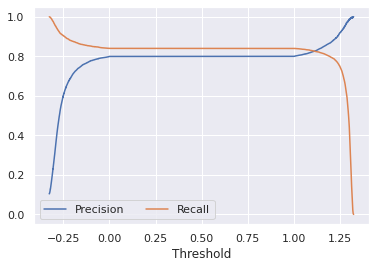

In [71]:
sns.set(font_scale=1) 
fig, ax = plt.subplots()
ax.plot(thresholds, precision[:-1], label="Precision")
ax.plot(thresholds, recall[:-1], label="Recall")
ax.set_xlabel("Threshold")
plt.legend(loc='lower left', ncol=2)

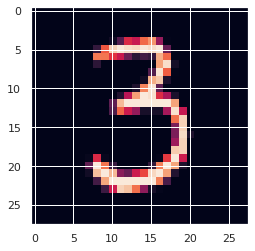

In [74]:
X_train[0].shape
plt.imshow(X_train[50].reshape(28,28))